In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
#Read Data
df=pd.read_csv('/Users/bhaveshshrivastava/Downloads//Complete Machine Learning with Python/Data Files/1. ST Academy - Crash course and Regression files/House_Price.csv', header=0)

In [23]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [25]:
df.shape

(506, 19)

In [ ]:
sns.distplot('n_hot_rooms')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

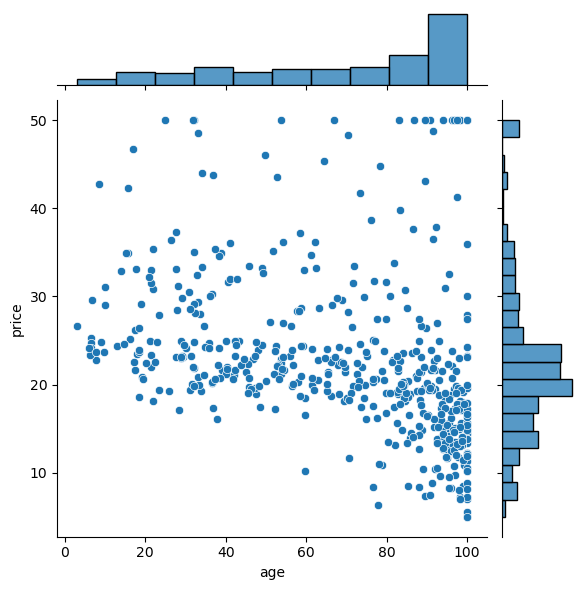

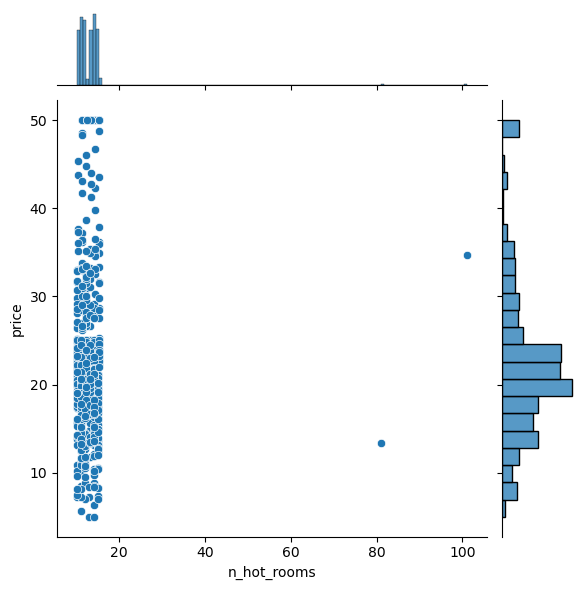

In [29]:
sns.jointplot(x='age',y='price',data=df)
sns.jointplot(x='n_hot_rooms',y='price',data=df)

<Axes: xlabel='airport', ylabel='count'>

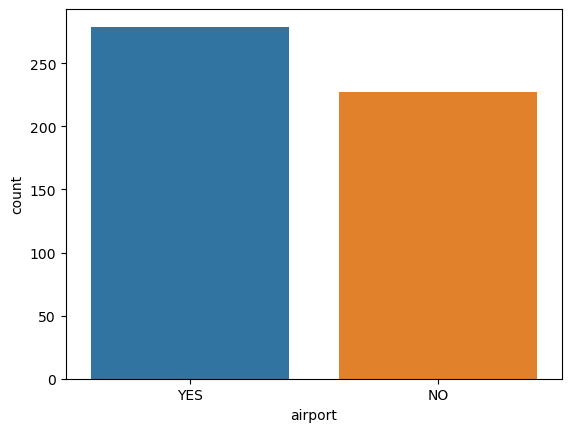

In [31]:
sns.countplot(x="airport",data=df)

<Axes: xlabel='waterbody', ylabel='count'>

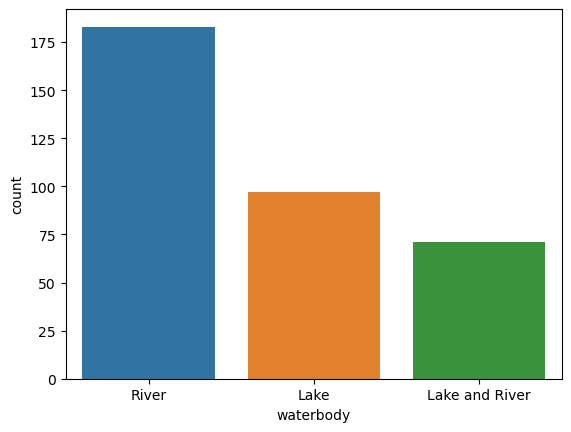

In [33]:
sns.countplot(x="waterbody",data=df)

<Axes: xlabel='bus_ter', ylabel='count'>

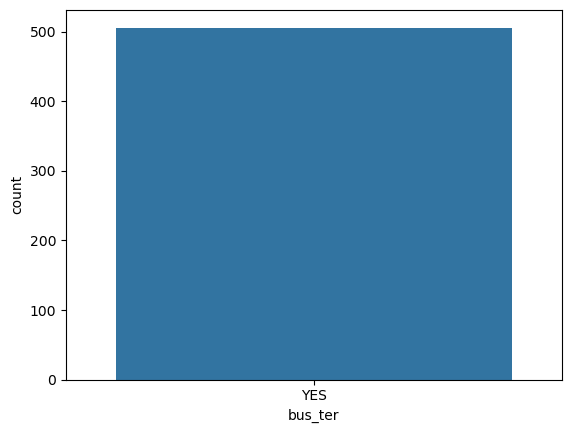

In [35]:
sns.countplot(x="bus_ter",data=df)

In [37]:
#Outlier Treatment
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [39]:
#Outlier Treatment
uv=np.percentile(df.n_hot_rooms,[99])[0]

In [41]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,NaN,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,NaN,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [43]:
df.n_hot_rooms[df.n_hot_rooms>3*uv]=3*uv

/var/folders/rj/9p0zpsh11xx2p64m_p7l94hh0000gn/T/ipykernel_91713/3384164456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[df.n_hot_rooms>3*uv]=3*uv


In [45]:
df.rainfall

0      23
1      42
2      38
3      45
4      55
       ..
501    27
502    20
503    31
504    47
505    45
Name: rainfall, Length: 506, dtype: int64

In [47]:
lv=np.percentile(df.rainfall,[1])[0]

In [49]:
df[df.rainfall<lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,NaN,3,YES,0.044019


In [51]:
df.rainfall[df.rainfall<0.3*lv]=0.3*lv

/var/folders/rj/9p0zpsh11xx2p64m_p7l94hh0000gn/T/ipykernel_91713/1196851839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[df.rainfall<0.3*lv]=0.3*lv


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


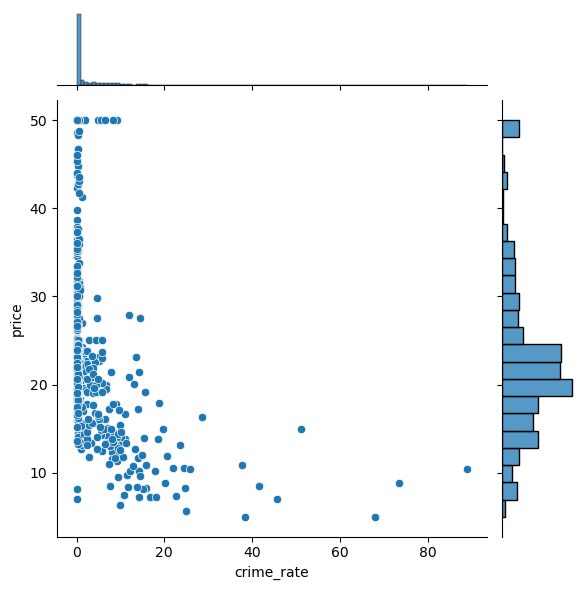

In [53]:
sns.jointplot(x='crime_rate',y='price',data=df)

In [55]:
#Missing Value Imputations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    351 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [57]:
df.n_hos_beds=df.n_hos_beds.fillna(df.n_hos_beds.mean())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


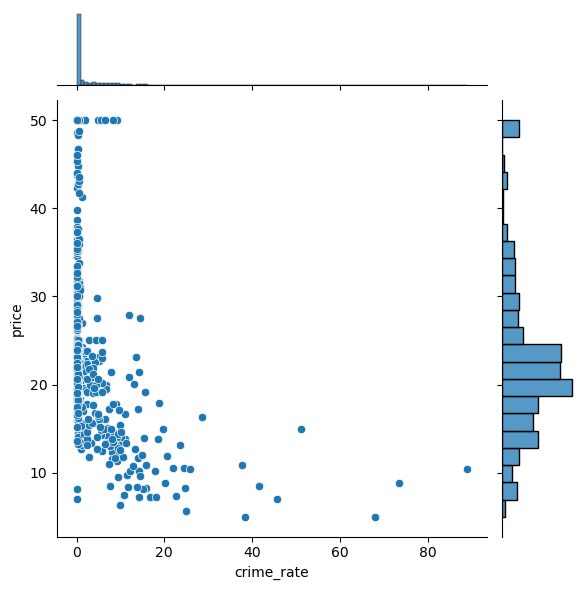

In [59]:
 #Variable Transformation
sns.jointplot(x="crime_rate", y="price",data=df)

 #From the plot we can see that it is a logarithmic plot

In [61]:
df.crime_rate=np.log(1+df.crime_rate)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


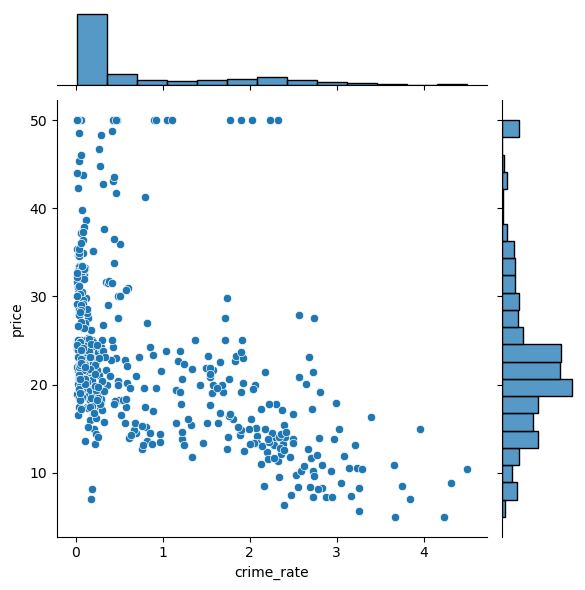

In [63]:
sns.jointplot(x="crime_rate", y="price",data=df)

#now the relationship becomes linear

In [65]:
df['avg_dist']=(df.dist1+df.dist2+df.dist3+df.dist3)

In [67]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,15.522115
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,8.451197
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,4.640000
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,8.670000
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,13.125000
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,21.207500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,48.890000


In [69]:
del df['dist1']

In [71]:
del df['dist2']

In [73]:
del df['dist3']

In [75]:
del df['dist4']

In [77]:
del df['bus_ter']

In [79]:
#Dummy Variables
df=pd.get_dummies(df)
df

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,16.52,False,True,False,False,True
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,19.93,True,False,True,False,False
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,19.91,True,False,False,False,False
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,24.46,False,True,True,False,False
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,24.76,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,10.61,True,False,False,True,False
502,20.6,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,9.47,False,True,False,True,False
503,23.9,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,8.98,True,False,False,False,False
504,22.0,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,9.65,False,True,False,False,False


In [81]:
del df['airport_NO']

In [83]:
df.airport_YES[df.airport_YES =='False']=0

/var/folders/rj/9p0zpsh11xx2p64m_p7l94hh0000gn/T/ipykernel_91713/3676010863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.airport_YES[df.airport_YES =='False']=0


In [85]:
df.airport_YES[df.airport_YES =='True']=1

/var/folders/rj/9p0zpsh11xx2p64m_p7l94hh0000gn/T/ipykernel_91713/2157814841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.airport_YES[df.airport_YES =='True']=1


In [87]:
#Correaltion
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.248686,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.587836,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.707854,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769658,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.204192,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747347,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.233582,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496093,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.029533,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.021672,-0.055338,0.037925,0.014755,-0.064096


## Building Linear Regression Model: Using statsmodel


In [90]:
import statsmodels.api as sn

In [91]:
X=sn.add_constant(df['room_num'])

In [94]:
linear_Model=sn.OLS(df['price'],X).fit()

In [96]:
linear_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.31e-74
Time:                        23:33:15   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Building Linear Regression Model: Using sklearn

In [99]:

from sklearn.linear_model import LinearRegression

In [101]:
y=df['price']

In [103]:
X=df[['room_num']]

In [105]:
Linear_Model2=LinearRegression()

In [107]:
Linear_Model2.fit(X,y)

LinearRegression()

In [109]:
print(Linear_Model2.intercept_, Linear_Model2.coef_)

-34.659243123097156 [9.09966966]


In [111]:
Linear_Model2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


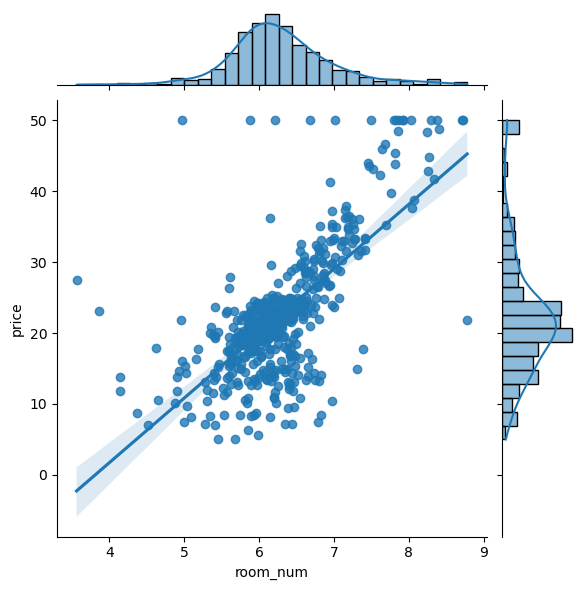

In [113]:
sns.jointplot(x=df['room_num'], y= df['price'], data=df, kind='reg')

###Miltiple Linear Model

In [115]:
import statsmodels.api as sn

In [116]:
X_Multi=df.drop("price",axis=1)
X_Multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,16.52,True,False,False,True
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,19.93,False,True,False,False
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,19.91,False,False,False,False
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,24.46,True,True,False,False
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,24.76,False,True,False,False


In [117]:
Y_Multi=df['price']

In [124]:
X_Multi['airport_YES'] = X_Multi['airport_YES'].replace({True: 1, False: 0})

In [126]:
X_Multi['waterbody_Lake'] = X_Multi['waterbody_Lake'].replace({True: 1, False: 0})

In [128]:
X_Multi['waterbody_Lake and River'] = X_Multi['waterbody_Lake and River'].replace({True: 1, False: 0})

In [130]:
X_Multi['waterbody_River'] = X_Multi['waterbody_River'].replace({True: 1, False: 0})
X_Multi

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,16.52,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,19.93,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,19.91,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,24.46,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,24.76,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,10.61,0,0,1,0
502,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,9.47,1,0,1,0
503,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,8.98,0,0,0,0
504,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,9.65,1,0,0,0


In [132]:
X_Multi_cons = sn.add_constant(X_Multi)

In [134]:
lm_Multi = sn.OLS(Y_Multi, X_Multi_cons).fit()

In [136]:
lm_Multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     79.22
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          1.97e-124
Time:                        23:33:17   Log-Likelihood:                -1515.9
No. Observations:                 506   AIC:                             3066.
Df Residuals:                     489   BIC:                             3138.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.8775      5.289     -1.300      0.194     -17.270       3.515
crime_rate                   0.0247      0.349      0.071      0.944      -0.660       0.710
resid_area                  -0.0421      0.058     -0.732      0.464      -0.155       0.071
air_qual                   -20.8342      5.893     -3.535      0.000     -32.414      -9.255
room_num                     4.0096      0.426      9.401      0.000       3.172       4.848
age                         -0.0054      0.014     -0.399      0.690      -0.032       0.021
teachers                     1.0136      0.122      8.299      0.000       0.774       1.254
poor_prop                   -0.5785      0.053    -10.976      0.000      -0.682      -0.475
n_hos_beds                   0.3377      0.153      2.214      0.027       0.038       0.637
n_hot_rooms                  0.0869      0.082      1.057      0.291      -0.075       0.248
rainfall                     0.0159      0.018      0.894      0.372      -0.019       0.051
parks                       58.2635     51.605      1.129      0.259     -43.130     159.658
avg_dist                    -0.3036      0.047     -6.448      0.000      -0.396      -0.211
airport_YES                  1.1107      0.454      2.444      0.015       0.218       2.003
waterbody_Lake               0.2561      0.642      0.399      0.690      -1.005       1.517
waterbody_Lake and River    -0.7006      0.714     -0.981      0.327      -2.103       0.702
waterbody_River             -0.2811      0.547     -0.514      0.607      -1.355       0.793
==============================================================================
Omnibus:                      179.556   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.425
Skew:                           1.531   Prob(JB):                    2.55e-174
Kurtosis:                       8.343   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multiple Linear Reg Model using sk learn

In [139]:
from sklearn.linear_model import LinearRegression

In [141]:
y_multi_sk=df['price']

In [143]:
X_multi_sk=df.drop(['price'],axis=1)

In [145]:
LM3_SK=LinearRegression()

In [147]:
LM3_SK.fit(X_multi_sk,y_multi_sk)

LinearRegression()

In [149]:
print(LM3_SK.intercept_,LM3_SK.coef_)

-6.877450065461343 [ 2.47036363e-02 -4.21370311e-02 -2.08342025e+01  4.00958061e+00
 -5.42245957e-03  1.01355765e+00 -5.78479529e-01  3.37673634e-01
  8.69181450e-02  1.59465965e-02  5.82635277e+01 -3.03598714e-01
  1.11065747e+00  2.56113898e-01 -7.00558427e-01 -2.81088690e-01]


## Test Train Split

In [152]:
from sklearn.model_selection import train_test_split

In [164]:
X_Train, X_test , Y_Train, Y_Test=train_test_split(X_multi_sk,Y_Multi,test_size=0.2,random_state=0)

In [168]:
print(X_Train.shape, X_test.shape , Y_Train.shape, Y_Test.shape)

(404, 16) (102, 16) (404,) (102,)


## Multiple Linear Model on Train Data

In [181]:
lm_a=LinearRegression()

In [185]:
lm_a.fit(X_Train,Y_Train)

LinearRegression()

In [189]:
Y_test_a=lm_a.predict(X_test)

In [191]:
Y_test_a

array([27.71734628, 23.03507509, 26.40167322, 12.60092746, 23.6966479 ,
       20.60184133, 19.74554496, 20.7247026 , 18.35206463, 23.14458446,
       13.98555786, 18.30942801, 16.69999617,  4.3350239 , 39.04745787,
       33.0785933 , 20.12228293, 35.76931039, 32.28178101, 23.19055096,
       26.19755753, 25.83308745, 21.30673444, 29.10903692, 21.78221625,
       10.08572261, 18.0676124 , 19.74429183, 37.50606982, 23.71704483,
       18.40408176, 16.80591434, 20.09830101, 23.01062623, 31.08801103,
       17.45127304, 10.88268757, 22.94107548, 19.51835873, 14.99409311,
       27.89272807, 21.92817218, 24.90969111, 13.25528701, 27.48186449,
       25.81845455, 21.43368738, 21.30374444,  9.94840866, 25.61679816,
       22.18675464, 17.70847062, 24.23591407, 32.80883681, 14.13434785,
       22.36670742, 21.16582463, 17.46046274, 20.68419832, 19.56574944,
       19.18225232, 21.68633134, 33.16080744, 31.8565527 , 15.38779627,
       33.7663526 , 17.46484984, 19.42475581, 21.04003611, 23.85

In [195]:
Y_train_a=lm_a.predict(X_Train)

In [197]:
from sklearn.metrics import r2_score

In [205]:
r2_score(Y_Test,Y_test_a)

0.5481773923208275

In [207]:
r2_score(Y_Train,Y_train_a)

0.7576513787923729